# Fig. 10:  evolution of $F^W_{ovS}$, $F^W_{azS}$, and $\Sigma$

In [1]:
import os
import sys
import cmocean
import numpy as np
import xarray as xr
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

In [2]:
%matplotlib inline
matplotlib.rc_file('rc_file_paper')
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
%load_ext autoreload
%autoreload 2
%aimport - numpy - scipy - matplotlib.pyplot

In [3]:
from MOC import approx_lats
from tqdm import notebook
from paths import file_ex_ocn_ctrl, file_ex_ocn_rcp, file_ex_ocn_lpd, path_prace, path_results, file_RMASK_ocn, file_RMASK_ocn_low
from filters import lowpass
from constants import rho_sw  # [kg/m^3]
from timeseries import IterateOutputCESM
from FW_transport import FW_SALT_flux_dataset
from xr_regression import xr_lintrend, xr_linear_trend, xr_2D_trends
from xr_DataArrays import xr_DZ
warnings.filterwarnings('ignore')

In [4]:
RMASK_ocn = xr.open_dataarray(file_RMASK_ocn)
RMASK_low = xr.open_dataarray(file_RMASK_ocn_low)
Atl_MASK_ocn = xr.DataArray(np.in1d(RMASK_ocn, [6,8,9]).reshape(RMASK_ocn.shape),
                            dims=RMASK_ocn.dims, coords=RMASK_ocn.coords)
Atl_MASK_low = xr.DataArray(np.in1d(RMASK_low, [6,8,9]).reshape(RMASK_low.shape),
                            dims=RMASK_low.dims, coords=RMASK_low.coords)

In [5]:
for i, run in enumerate(['ctrl', 'rcp', 'lpd', 'lr1']):
    fn_out = f'{path_prace}/Mov/FW_SALT_fluxes_{run}.nc'
    if run=='ctrl':  Mov_ctrl = xr.open_dataset(fn_out, decode_times=False)
    if run=='rcp' :  Mov_rcp  = xr.open_dataset(fn_out, decode_times=False)
    if run=='lpd' :  Mov_lpd  = xr.open_dataset(fn_out, decode_times=False)
    if run=='lr1' :  Mov_lr1  = xr.open_dataset(fn_out, decode_times=False)
        
def rmean(da):
    return da.rolling(time=11, center=True).mean()
    
Fov_ctrl, Fov_rcp = Mov_ctrl.Fov.isel(nlat_u=810), Mov_rcp.Fov.isel(nlat_u=810)
Faz_ctrl, Faz_rcp = Mov_ctrl.Faz.isel(nlat_u=810), Mov_rcp.Faz.isel(nlat_u=810)
Fov_lpd, Fov_lr1 = Mov_lpd.Fov.isel(nlat_u=85), Mov_lr1.Fov.isel(nlat_u=85)
Faz_lpd, Faz_lr1 = Mov_lpd.Faz.isel(nlat_u=85), Mov_lr1.Faz.isel(nlat_u=85)

Fov_N_ctrl, Fov_N_rcp = Mov_ctrl.Fov.isel(nlat_u=1867), Mov_rcp.Fov.isel(nlat_u=1867)
Faz_N_ctrl, Faz_N_rcp = Mov_ctrl.Faz.isel(nlat_u=1867), Mov_rcp.Faz.isel(nlat_u=1867)
Fov_N_lpd , Fov_N_lr1 = Mov_lpd.Fov.isel(nlat_u=348), Mov_lr1.Fov.isel(nlat_u=348)
Faz_N_lpd , Faz_N_lr1 = Mov_lpd.Faz.isel(nlat_u=348), Mov_lr1.Faz.isel(nlat_u=348)

Text(613, -0.16, 'unstable')

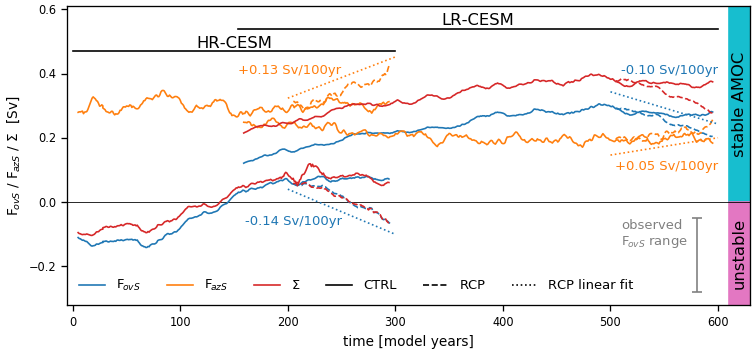

In [6]:
# revised version
f = plt.figure(figsize=(6.4,3))
ov, az, deg, Sigma = r'$_{\!ovS}$', r'$_{\!azS}$', r'$\!^\circ\!$', r'$\Sigma$'
plt.ylabel(f'F{ov} / F{az} / {Sigma}  [Sv]')

plt.axhline(0, c='k', lw=.5)
plt.ylim((-.32,.61))
    

fov, = plt.plot(Mov_ctrl.Fov.time/365/24 , rmean(Fov_ctrl)           , c='C0', label=f'F{ov}')
plt.plot(Mov_rcp .Fov.time/365+200, rmean(Fov_rcp )                  , c='C0', ls='--')
faz, = plt.plot(Mov_ctrl.Faz.time/365/24 , rmean(Faz_ctrl)           , c='C1', label=f'F{az}')
plt.plot(Mov_rcp .Faz.time/365+200, rmean(Faz_rcp )                  , c='C1', ls='--')
sig, = plt.plot(Mov_ctrl.Fov.time/365/24 , rmean(Fov_ctrl-Fov_N_ctrl), c='C3', label=r'$\Sigma$')
plt.plot(Mov_rcp .Fov.time/365+200, rmean(Fov_rcp -Fov_N_rcp )       , c='C3', ls='--')
ctl, = plt.plot([0,0],[0,0], c='k',                 label='CTRL')
rcp, = plt.plot([0,0],[0,0], c='k', lw=1, ls='--', label='RCP')
lin, = plt.plot([0,0],[0,0], c='k', lw=1, ls=':' , label='RCP linear fit')
plt.plot(Fov_rcp.time/365+200, xr_lintrend(Fov_rcp)-.04, ls=':', c=f'C0')
plt.plot(Fov_rcp.time/365+200, xr_lintrend(Faz_rcp)+.04, ls=':', c=f'C1')
plt.text(250,-.07, f'{xr_linear_trend(Fov_rcp).values*365*100:4.2f} Sv/100yr', color=f'C0', ha='right', fontsize=8)
plt.text(250,.4  ,f'+{xr_linear_trend(Faz_rcp).values*365*100:4.2f} Sv/100yr', color=f'C1', ha='right', fontsize=8)

plt.plot(Mov_lpd.Fov.time/365+154, rmean(Fov_lpd)          , c='C0')
plt.plot(Mov_lpd.Faz.time/365+154, rmean(Faz_lpd)          , c='C1')
plt.plot(Mov_lpd.Fov.time/365+154, rmean(Fov_lpd-Fov_N_lpd), c='C3')
plt.plot(Mov_lr1.Fov.time/365+500, rmean(Fov_lr1)          ,ls='--', c='C0',)
plt.plot(Mov_lr1.Faz.time/365+500, rmean(Faz_lr1)          ,ls='--', c='C1',)
plt.plot(Mov_lr1.Fov.time/365+500, rmean(Fov_lr1-Fov_N_lr1),ls='--', c='C3',)
plt.plot(Fov_lr1.time/365+500, xr_lintrend(Fov_lr1)+.04, ls=':', c=f'C0')
plt.plot(Fov_lr1.time/365+500, xr_lintrend(Faz_lr1)-.04, ls=':', c=f'C1')
plt.text(600, .4, f'{xr_linear_trend(Fov_lr1).values*365*100:4.2f} Sv/100yr', ha='right', color=f'C0', fontsize=8)
plt.text(600, .1,f'+{xr_linear_trend(Faz_lr1).values*365*100:4.2f} Sv/100yr', ha='right', color=f'C1', fontsize=8)

plt.legend(loc='lower left', ncol=6, fontsize=8, frameon=False)
plt.xlim((-5,630))
plt.xlabel('time [model years]')

plt.plot([0,300],[.47,.47], c='k')
plt.plot([154,600],[.54,.54], c='k')
plt.text(150, .48, 'HR-CESM', ha='center')
plt.text(377, .55, 'LR-CESM', ha='center')
    
plt.errorbar(x=580, y=-.165, fmt='none', yerr=.115, capsize=3, c='grey')
plt.text(510,-.1, f'observed\nF{ov} range', va='center', fontsize=8, color='grey')

x = [610,630]
l1 = [.7,.7]
l2 = [-.4,-.4]
plt.fill_between(x,0,l1, color='tab:cyan')
plt.fill_between(x,l2,0, color='tab:pink')
plt.text(613,.305, 'stable AMOC'  , va='center', rotation=90)
plt.text(613,-.16, 'unstable', va='center', rotation=90)
# plt.savefig(f'{path_results}/FW-paper/Fig10.eps')
